# **Desafio prático - Classificação de dados do Titanic**

## **Bibliotecas auxiliares**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Conjuntos de dados**

In [2]:
# esse conjunto que o Kaggle chama de teste não será usado dessa forma porque ele não 
# contém a classe dos exemplos e, dessa forma, não podemos avaliar o modelo com ele.
# para a avaliação, vamos separar o conjunto inicial que vamos chamar de "df" entre treino e teste
# e fazer as predições para submeter para o Kaggle com o conjunto chamado de "submission"
df = pd.read_csv('./datasets/train.csv')
submission = pd.read_csv('./datasets/test.csv')

Vamos ver a carinha dos nossos conjuntos de dados?

In [3]:
df.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C

In [4]:
submission.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

### **Remoção de features irrelevantes**

In [5]:
def count_unique(df):
  print("Quantidade de valores únicos para cada feature")
  for i in df.columns:
    print(f"{i}: {df[i].nunique()}")

In [6]:
count_unique(df)

Quantidade de valores únicos para cada feature
PassengerId: 891
Survived: 2
Pclass: 3
Name: 891
Sex: 2
Age: 88
SibSp: 7
Parch: 7
Ticket: 681
Fare: 248
Cabin: 147
Embarked: 3


Podemos remover esses casos que não fazem sentido do nosso conjunto de dados:

In [7]:
columns = ['PassengerId', 'Name', 'Ticket', 'Cabin']

df = df.drop(columns, axis=1)

In [8]:
df.head(2)

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C

### **Análise exploratória (Exploratory Data Analysis - EDA)**

### Survived (Sobrevivência do passageiro)

Primeiramente, é interessante olharmos a proporção do nosso target no nosso conjunto de dados:

In [9]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

Os passageiros com o target igual a 0 são aqueles que não sobreviveram ao naufrágio, enquanto que os que sobreviveram estão com o valor 1 no target.

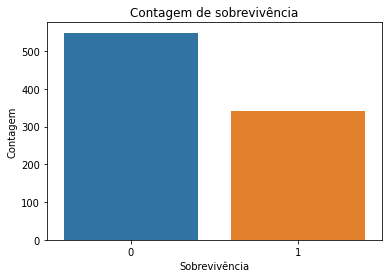

In [10]:
sns.countplot(data=df, x = 'Survived')
plt.title("Contagem de sobrevivência")
plt.xlabel('Sobrevivência')
plt.ylabel('Contagem')
plt.show()

In [11]:
print(f"Considerando nosso conjunto de dados, {df.Survived.value_counts()[0]/df.shape[0]*100:.2f}% dos passageiros não sobreviveram ao naufrágio :(")

Considerando nosso conjunto de dados, 61.62% dos passageiros não sobreviveram ao naufrágio :(


###  Pclass (classe do ticket do passageiro) 	 	 	 	 	 	

 De acordo com a descrição das features no Kaggle, os valores para esse atributo têm os seguintes significados:
 - 1 - Classe alta
 - 2 - Classe média
 - 3 - Classe baixa

 Contando a quantidade de exemplos de cada uma dessas classes, podemos observar que a maioria dos passageiros era de classe baixa:

In [12]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Podemos agora comparar a classe dos passageiros com relação ao nosso target para verificar se ela é relevante:

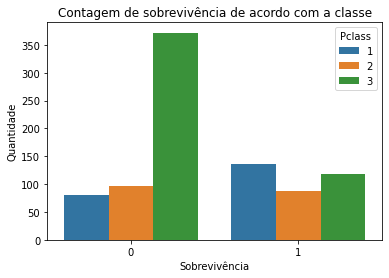

In [13]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Pclass')
plt.title("Contagem de sobrevivência de acordo com a classe")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [14]:
# proporção de sobrevivência por classe
df[["Pclass", "Survived"]].groupby(['Pclass']).mean()*100

Survived
Pclass           
1       62.962963
2       47.282609
3       24.236253

Apesar dos passageiros da terceira classe serem os mais numerosos, podemos observar tanto pela contagem de sobrevivência quanto pela proporção que esses passageiros foram os que menos sobreviveram, enquanto que os passageiros da primeira classe foram os que mais sobreviveram.

###  Sex (gênero do passageiro) 	 	 	 	

Com relação ao gênero, podemos observar que a maioria dos passageiros eram homens:

In [15]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

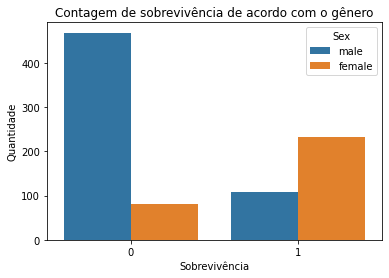

In [16]:
p = sns.countplot(data=df, x = 'Survived', hue = 'Sex')
plt.title("Contagem de sobrevivência de acordo com o gênero")
plt.xlabel("Sobrevivência")
plt.ylabel("Quantidade")
plt.show()

In [17]:
# proporção de sobrevivência por gênero
df[["Sex", "Survived"]].groupby(['Sex']).mean()*100

Survived
Sex              
female  74.203822
male    18.890815

Aqui também podemos observar uma situação similar ao que ocorreu com a classe: os passageiros do gênero masculino, apesar de mais numerosos, tiveram uma baixa proporção de sobrevivência quando comparamos com as mulheres.

Uma outra análise interessante de ser realizada é observar as taxas de sobrevivência dependendo do gênero e também da classe:

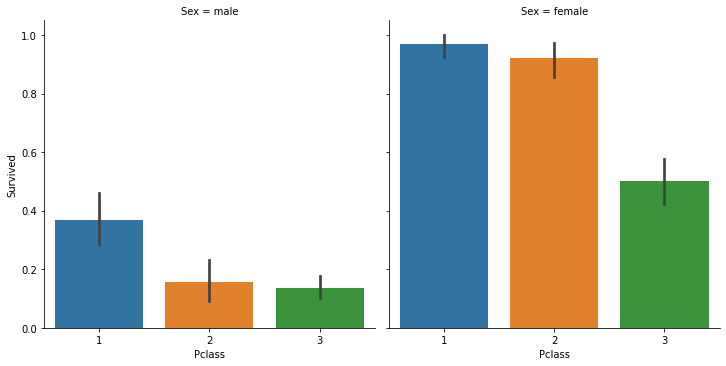

In [18]:
sns.catplot(x="Pclass", y="Survived", col="Sex", data=df,kind="bar");

O gráfico acima nos permite observar que tanto para homens quanto para mulheres houve uma maior sobrevivência para os passageiros da primeira classe. Ele também nos permite observar que a taxa de sobrevivência das mulheres da terceira classe é mais próxima da taxa de sobrevivência dos homens da primeira classe do que das mulheres da primeira e segunda classe.

###  Age (idade do passageiro) 	 	

Observando a descrição abaixo, vemos que, na média, os passageiros tinham em torno de 30 anos:

In [19]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

/home/cesaraugusto/.pyenv/versions/3.8.2/envs/tools/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


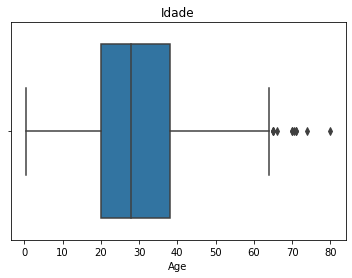

In [20]:
_ = sns.boxplot(df['Age']).set_title("Idade")

Podemos checar também a distribuição das idades por sobrevivência. Se tentarmos ver a distribuição da idade do jeito como nosso dado está, teremos um erro porque a idade tem valores nulos. Para fazer a distribuição, temos duas alternativas:
- Ignorar os nulos e ver a distribuição da idade só para os passageiros que possuem essa informação
- Substituir os valores faltantes por algum número (0, média ou mediana da idade, por exemplo)

Aqui vamos só ignorar os nulos:



In [21]:
survived_age_not_null = df.loc[(df.Survived == 1) & (df.Age.isnull()==False), 'Age']
not_survived_age_not_null = df.loc[(df.Survived == 0) & (df.Age.isnull()==False), 'Age']

/home/cesaraugusto/.pyenv/versions/3.8.2/envs/tools/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cesaraugusto/.pyenv/versions/3.8.2/envs/tools/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


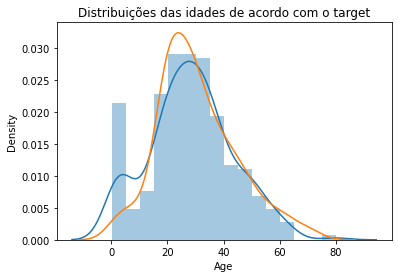

In [22]:
sns.distplot(survived_age_not_null, hist=True, label='Sobreviveu')
sns.distplot(not_survived_age_not_null, hist=False, label='Não sobreviveu')
_ = plt.title("Distribuições das idades de acordo com o target")

Se fizermos as distribuições das idades entre os passageiros que sobreviveram ou não, podemos notar que há pico de sobrevivência para os passageiros com menos de 10 anos, indicando que crianças tiveram mais chances de sobreviverem ao naufrágio do que adultos.

## Feature Engineering

#### **Tratamento de valores faltantes (missing values)**

Como pudemos observar nas descrições acima, há casos de passageiros sem informação sobre suas idades. Podemos substituir esses valores faltantes pela mediana das idades:

In [23]:
median_age = df['Age'].median() 

In [24]:
df.loc[df['Age'].isnull(), 'Age'] = median_age

#### **Conversão de features categóricas**

A feature que indica o gênero dos passageiros é categórica. Iremos transformá-la em uma feature numérica. Há diversas abordagens para realizar essa transformação:
- Uma delas é utilizando o [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

- E outra delas é fazendo o [One-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

No nosso caso, vamos utilizar o LabelEncoder:


In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'])

# ao invés do LabelEncoder, também poderíamos ter feito só um map e passar as transformações que queríamos:
# df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1})

In [28]:
df['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

Se a gente comparar essas quantidades com o que tínhamos na feature _Sex_, as substituições foram feitas da seguinte maneira:
- Se o gênero do passageiro fosse feminino, a feature _Sex_ ficaria com valor 0
- Se o gênero do passageiro fosse masculino, a feature _Sex_ ficaria com valor 1

## Treinamento
Antes de treinar o modelo, precisamos separar as features do nosso target 

Além disso, nessa primeira versão, vamos utilizar somente as 3 features que analisamos na aula:

In [29]:
# nossas features
x = df[['Age', 'Sex', 'Pclass']]

# nosso target
y = df['Survived']

Uma outra coisa que precisamos fazer antes de treinar o modelo é separar o nosso conjunto de dados entre o **conjunto de treinamento** e o **conjunto de teste**. No nosso caso, vamos usar 75% do conjunto para treinamento e o restante para teste:

In [30]:
from sklearn.model_selection import train_test_split

# Separando os dados em treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [31]:
x_train.shape

(668, 3)

In [32]:
x_test.shape

(223, 3)


Esse nosso primeiro modelo será uma Árvore de decisão. O scikit-learn já contém uma implementação dela [aqui](https://scikit-learn.org/stable/modules/tree.html).



In [33]:
from sklearn.tree import DecisionTreeClassifier

# Instanciando o classificador
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Treinamento do modelo
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

## Avaliando nosso modelo

Agora precisamos avaliar se o modelo está bom ou não!

Para isso, precisamos utilizá-lo para realizar as predições para nosso conjunto de teste:

In [34]:
y_pred = model.predict(x_test)

Como a métrica de avaliação do Kaggle é a acurácia, vamos utilizá-la primeiro:

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test, y_pred)

0.7623318385650224

De todas as predições que nosso modelo fez, ele acertou em 76,23% dos casos.

Outra avaliação que poderíamos fazer é utilizando uma matriz de confusão:

In [37]:
from sklearn.metrics import confusion_matrix
import itertools

In [38]:
# plota a matriz de confusão. Código retirado da documentação do próprio Sklearn
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    #plt.ylim(0.5, 0.5)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylim(1.5, -0.5) 

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Classe real')
    plt.xlabel('Classe prevista')
    plt.tight_layout()

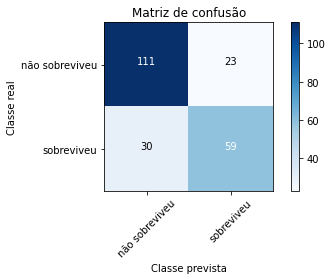

In [39]:
cnf_matrix = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=[ 'não sobreviveu', 'sobreviveu'])

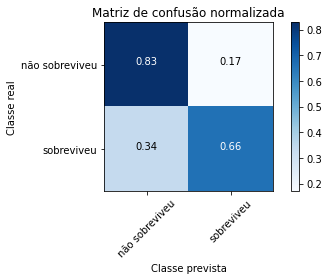

In [40]:
plot_confusion_matrix(cnf_matrix, normalize=True, classes=[ 'não sobreviveu', 'sobreviveu'], title='Matriz de confusão normalizada')

Pela matriz de confusão acima, podemos notar que nosso modelo se confundiu mais para 34% dos passageiros que sobreviveram, predizendo que eles não haviam sobrevivido.

## Predição


In [41]:
# substituímos os valores faltantes pela mediana da idade do conjunto de treinamento
submission.loc[submission['Age'].isnull(), 'Age'] = median_age

In [42]:
# utilizamos o encoder que foi criado com base no conjunto de treinamento
# como o LabelEncoder já "aprendeu" com o conjunto de treinamento como substituir esses valores,
# a gente usa só o transform e não fit_transform como fizemos na feature engineering 
submission['Sex'] = encoder.transform(submission['Sex'])

In [43]:
# realiza a predição para o conjunto de submissão do Kaggle
result = model.predict(submission[['Age', 'Sex', 'Pclass']])

In [44]:
result

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,

Para a submissão no Kaggle, além da predição, precisamos fornecer também o ID do passageiro:

In [45]:
# transformar o array em um DataFrame para concatenarmos como ID
results = pd.DataFrame(list(result), columns=['Survived'])

In [46]:
submission = pd.concat([submission['PassengerId'], results],axis=1)
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1

In [47]:
submission.to_csv("titanic_submission.csv", index=False)

Se todas fizemos tudo igualzinho, a acurácia que obtivemos no nosso modelo inicial foi de **0.68421**